 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [ ]:
# Reading whale returns
csv_path = Path("./Resources/whale_returns.csv")
whale_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

whale_df.head(10)

In [40]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [41]:
whale_df.isnull

<bound method DataFrame.isnull of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN 

In [42]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [43]:
# Drop nulls
# df['Base'] = df['Base'].str.replace('USDT','') - sometimes will need to use this when inplace = true wont work
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [44]:
# Reading algorithmic returns
csv_path = Path("./Resources/algo_returns.csv")
algo_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [45]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [46]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [47]:
# Cleanse nulls from DataFrame by filling na
algo_df['Algo 2'] = algo_df['Algo 2'].fillna("NaN")
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [48]:
# Reading S&P 500 Closing Prices
csv_path = Path("./Resources/sp500_history.csv")
sp500_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.head(10)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
2019-04-15,$2905.58
2019-04-12,$2907.41
2019-04-11,$2888.32
2019-04-10,$2888.21


In [49]:
sp500_df = sp500_df.replace('\$','',regex=True).astype(float)
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [50]:
# Check Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [51]:
# Fix Data Types
# Use the `as_type` function to convert `close from object to `float`
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [52]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change()
daily_returns.head(10)

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
2019-04-12,0.000630
2019-04-11,-0.006566
2019-04-10,-0.000038


In [53]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df.head(10)

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
2019-04-15,2905.58
2019-04-12,2907.41
2019-04-11,2888.32
2019-04-10,2888.21


In [54]:
sp500_df.isnull().sum()

Close    0
dtype: int64

In [55]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns = ['SP500 Daily Close']
sp500_df.head()

,SP500 Daily Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


## Combine Whale, Algorithmic, and S&P 500 Returns

In [56]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine_returns = pd.concat([whale_df, algo_df, daily_returns], axis="columns", join="inner")
combine_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [57]:
combine_returns.isnull().sum()
combine_returns.dropna(inplace=True)
combine_returns.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.012445
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.006112
2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.013353


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

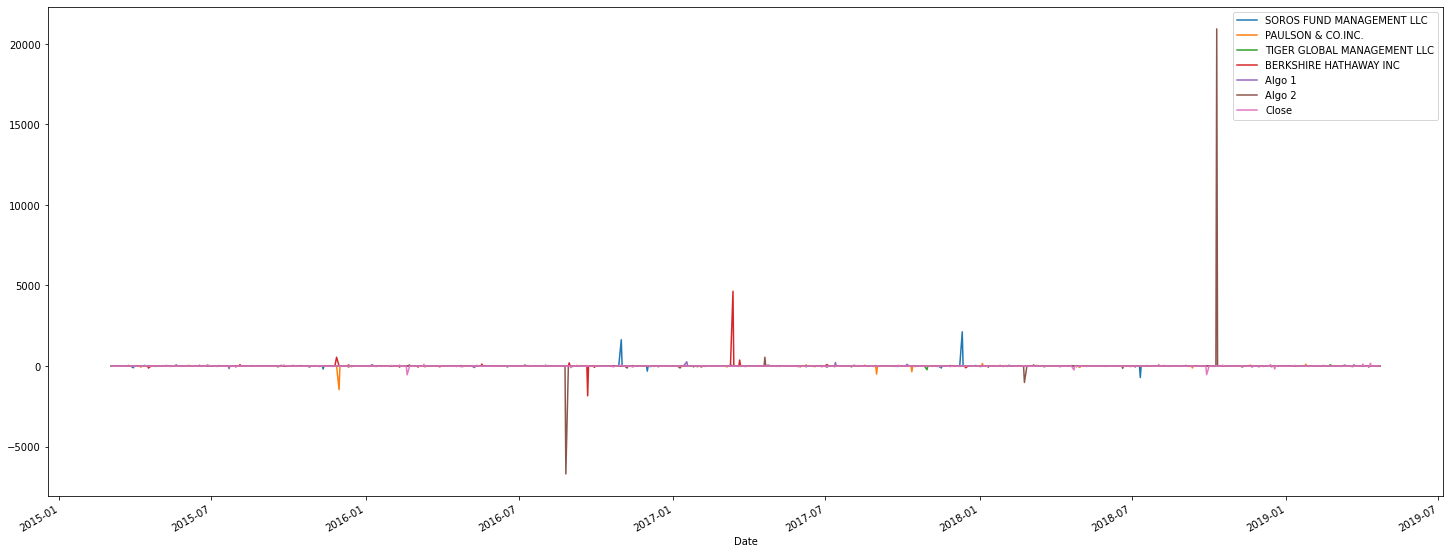

In [58]:
# Plot daily returns of all portfolios
daily_combine_returns = combine_returns.pct_change()
daily_combine_returns.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

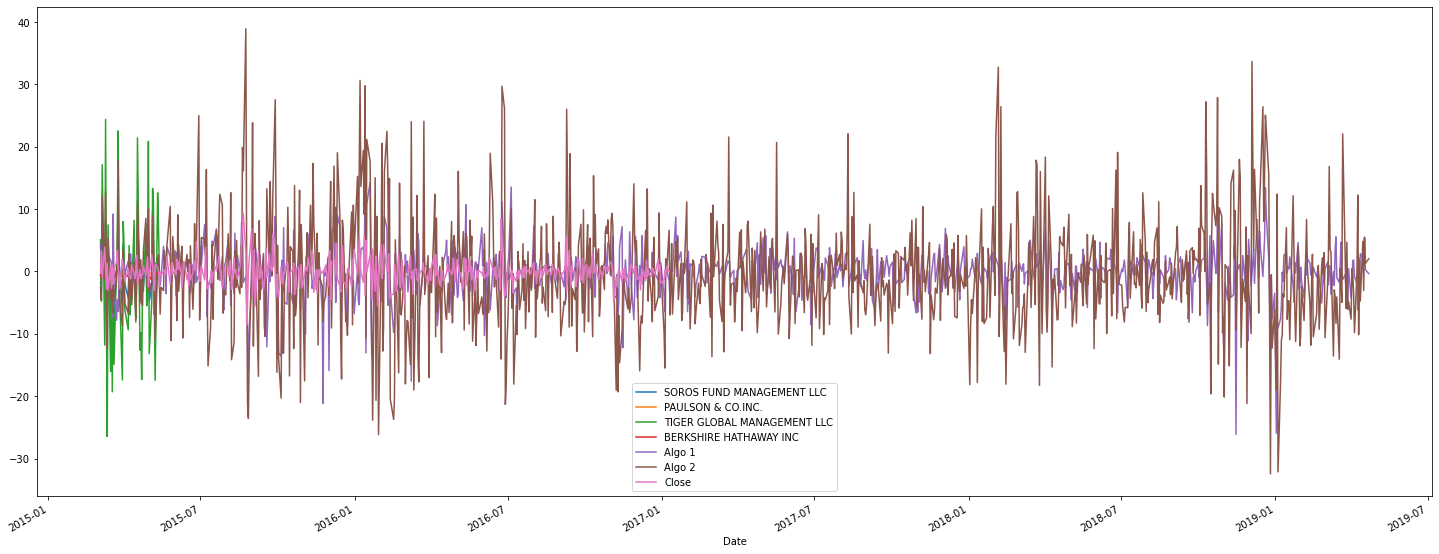

In [59]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_combine_returns).cumprod() 
cumulative_returns
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

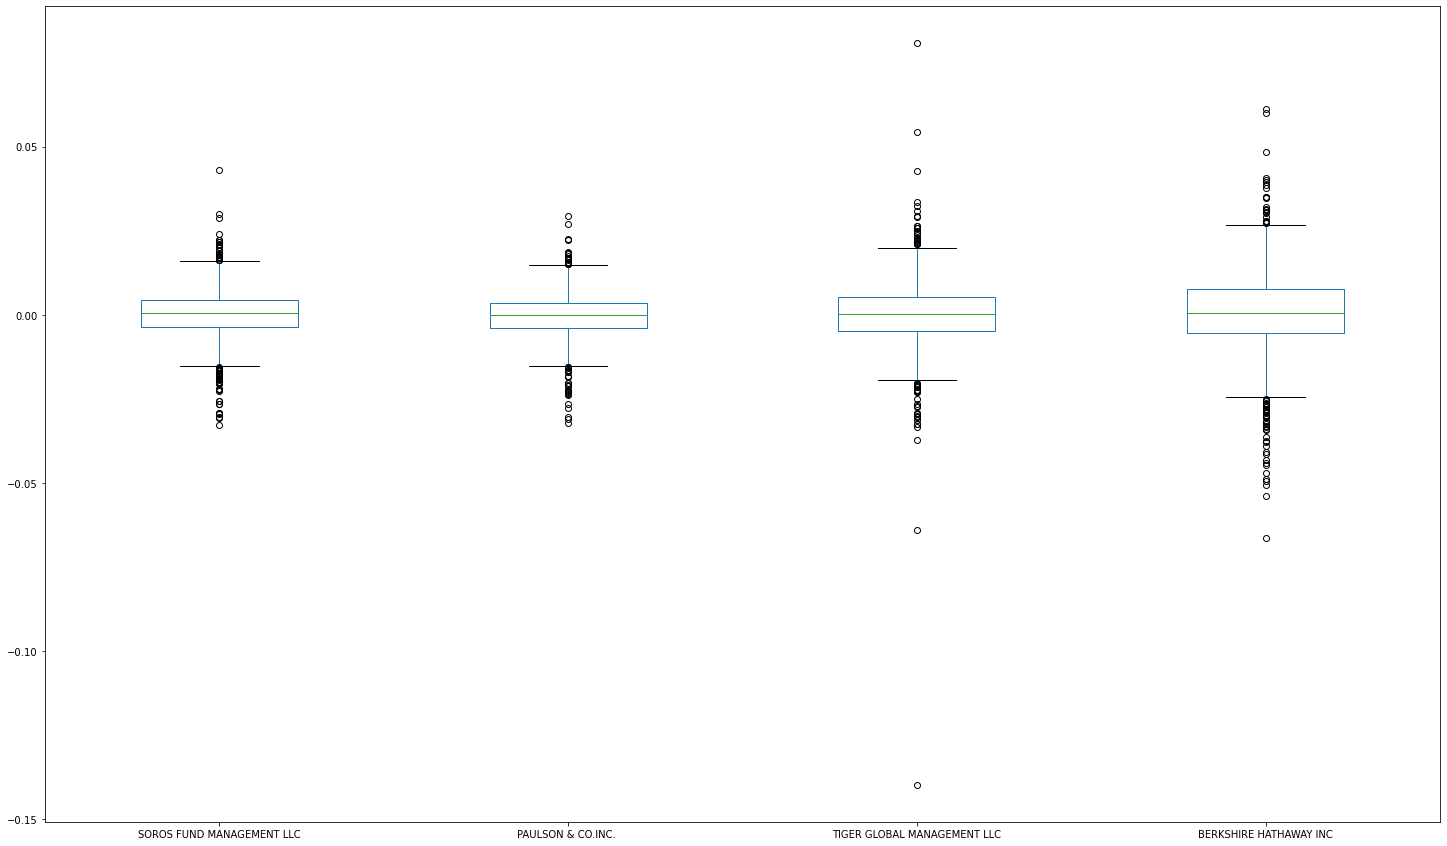

In [60]:
# Box plot to visually show risk
whale_df.plot(kind = 'box', figsize=(25, 15))

<AxesSubplot:>

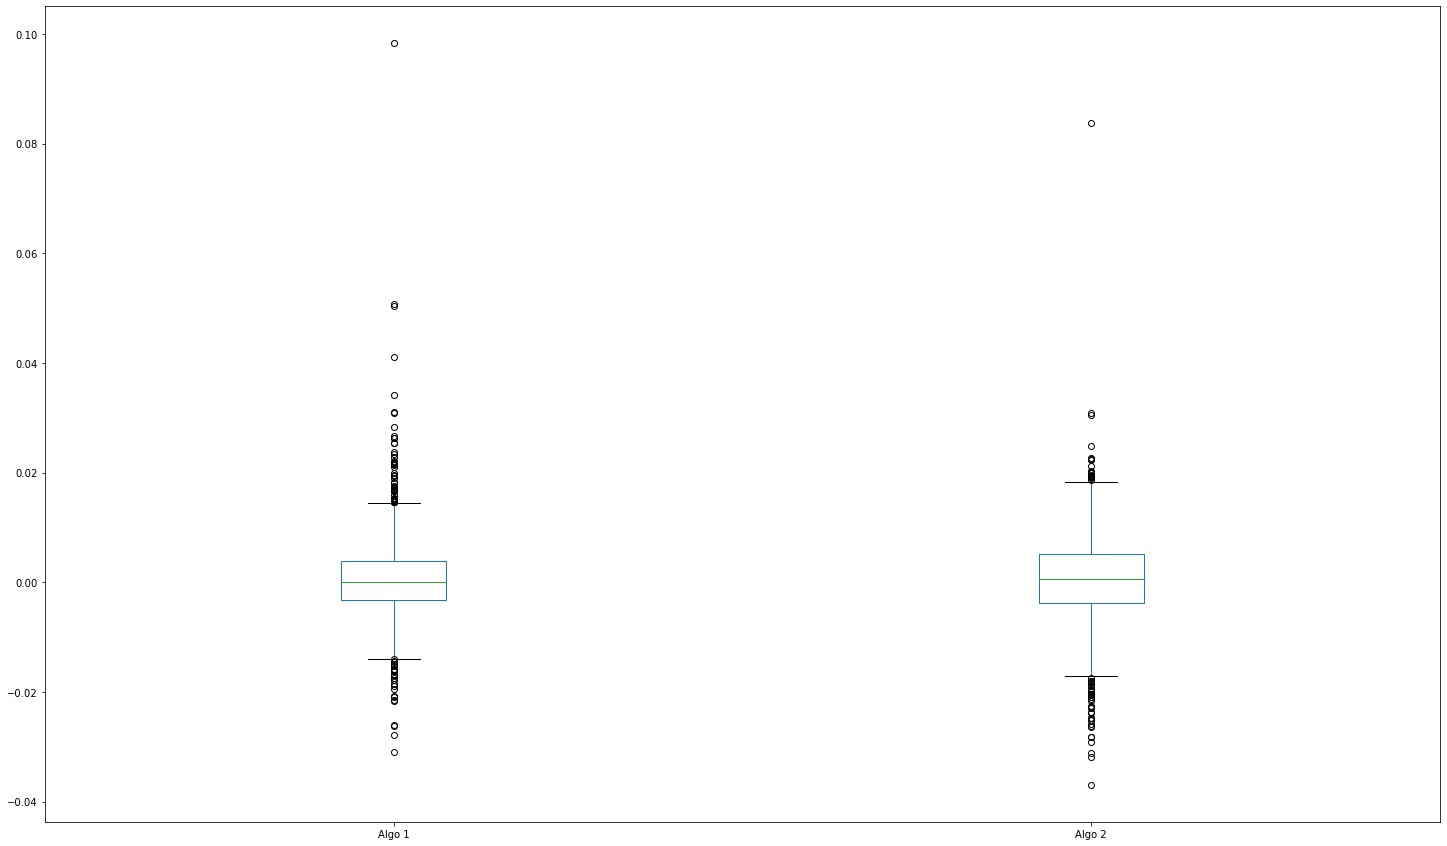

In [61]:
algo_df.plot(kind = 'box', figsize=(25, 15))

<AxesSubplot:>

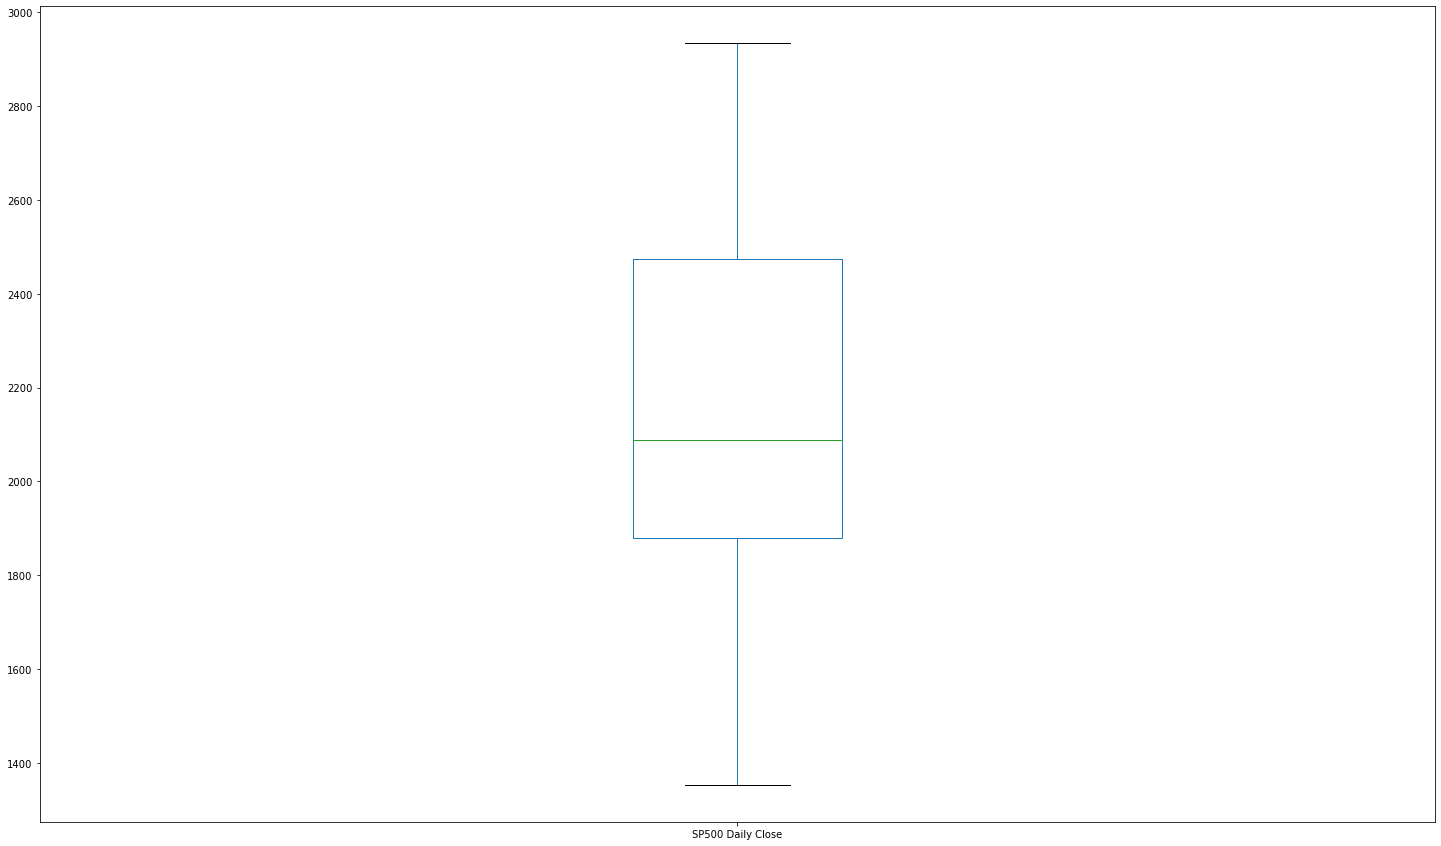

In [62]:
sp500_df.plot(kind = 'box', figsize=(25, 15))

<AxesSubplot:>

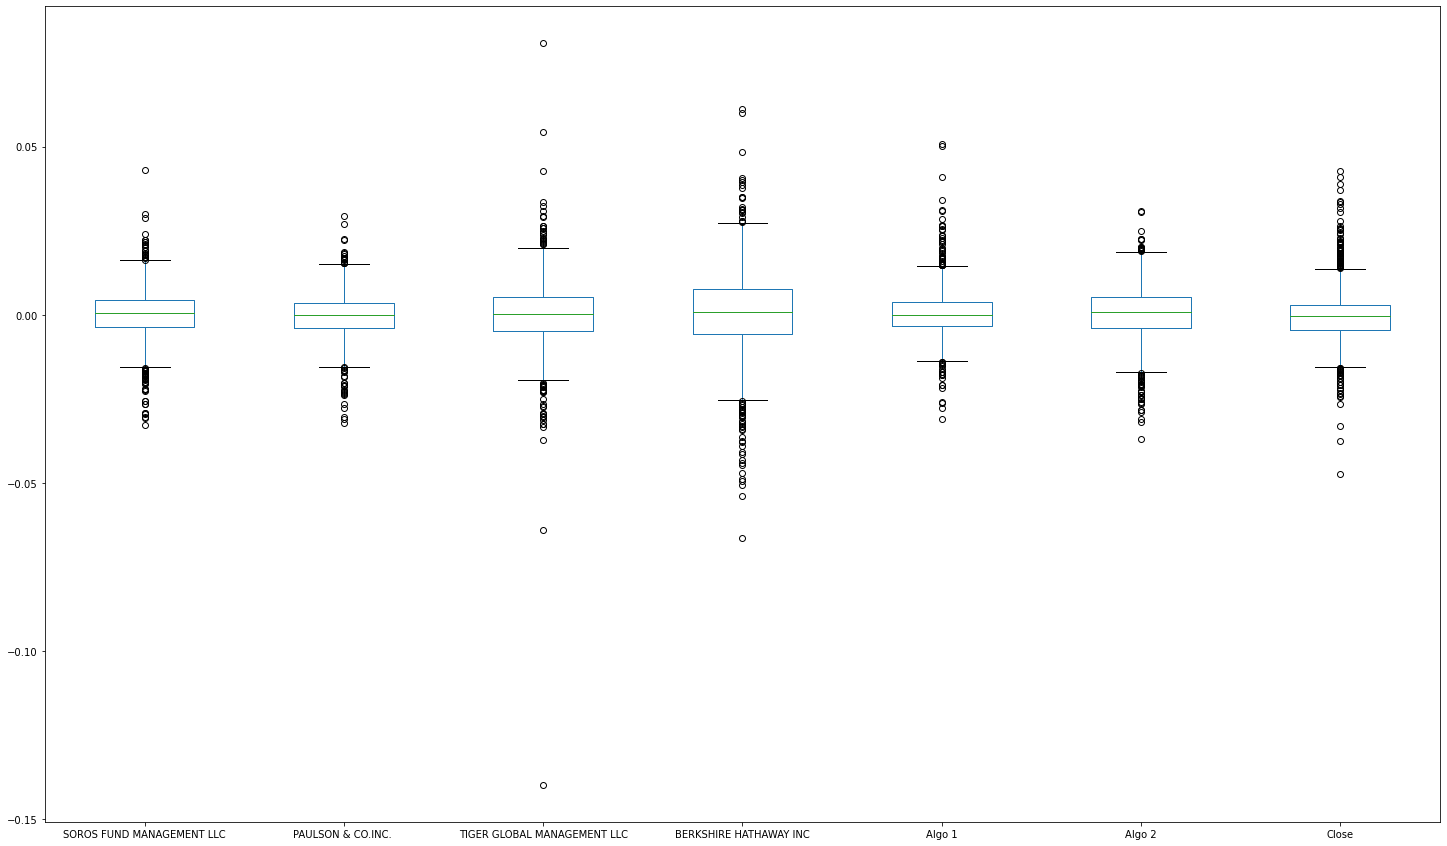

In [65]:
combine_returns.plot(kind = 'box', figsize=(25, 15))

### Calculate Standard Deviations

In [66]:
# Calculate the daily standard deviations of all portfolios
combine_returns.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Close                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:>

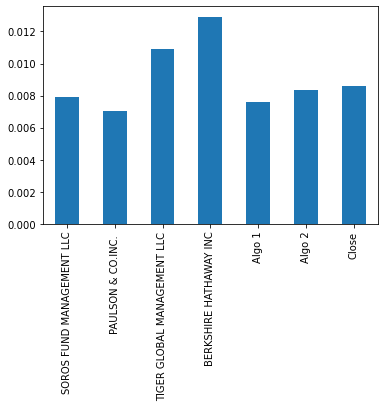

In [68]:
# Calculate  the daily standard deviation of S&P 500
sp500_df.std()

# Determine which portfolios are riskier than the S&P 500


combine_returns.std().plot(kind = 'bar')

### Calculate the Annualized Standard Deviation

In [69]:
# Calculate the annualized standard deviation (252 trading days)

annual_std = portfolio_std * np.sqrt(252)
annual_std.head(10)

,Whale,Algo,SP500
0,-1.899858,-20.934457,-36.147885
1,2.385208,5.745794,-39.741909
2,0.137878,13.716108,-15.122557
3,-0.435897,-8.735293,-32.692283
4,-0.433978,1.985352,-3.746531
5,-11.587779,19.430878,0.009713
6,8.011317,-17.879442,4.996663
7,1.325534,-1.291592,12.884953
8,-2.905227,31.990790,-15.762456
9,-8.263917,-12.032750,48.779944


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

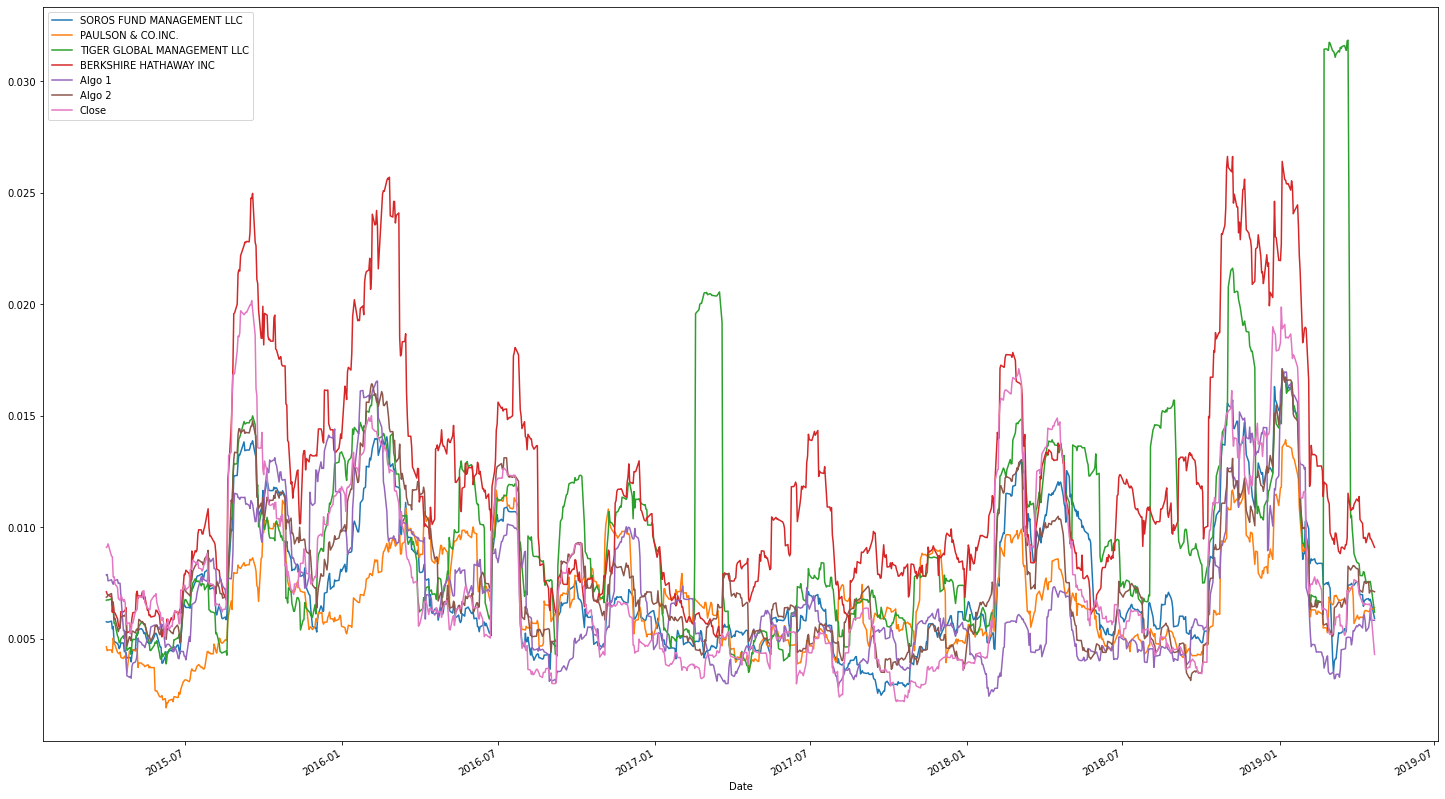

In [70]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combine_returns.rolling(window=21).std().plot(figsize=(25, 15))
# Plot the rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

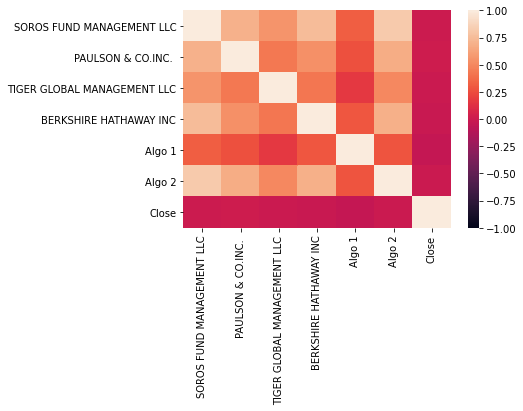

In [75]:
# Calculate the correlation
import seaborn as sns
correlation = combine_returns.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [83]:
# Calculate covariance of a single portfolio
covariance = whale_df['SOROS FUND MANAGEMENT LLC'].cov(daily_returns['Close'])
covariance


3.8897269830622025e-08

In [86]:
# Calculate variance of S&P 500
variance = daily_returns['Close'].var()
variance

6.617241051948298e-05

In [87]:
# Computing beta
amzn_beta = covariance / variance
amzn_beta

0.0005878170301680275

<AxesSubplot:title={'center':'Beta Trend'}, xlabel='Date'>

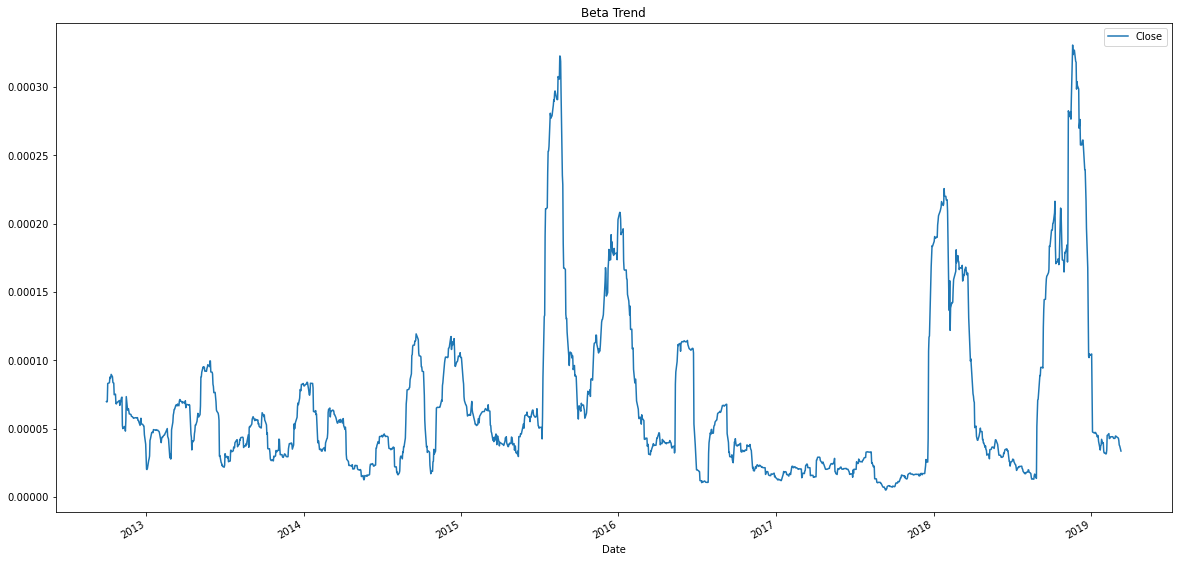

In [91]:
# Plot beta trend
rolling_covariance = daily_returns.rolling(window=30).cov(daily_returns['Close'])
rolling_covariance.plot(figsize=(20, 10), title='Beta Trend')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [94]:
# Use `ewm` to calculate the rolling window
combine_returns.ewm(com=0.5).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.001356,0.001186,-0.002024,0.001518,-0.006927,0.001575,0.000206
2015-03-05,0.003198,0.003187,0.001007,0.005124,-0.002793,0.003478,0.010017
2015-03-06,-0.004297,-0.001377,-0.005397,-0.007176,-0.004253,-0.006606,0.000604
2015-03-09,-0.001031,0.002373,0.002127,-0.003478,-0.005052,-0.001311,0.011750
...,...,...,...,...,...,...,...
2019-04-15,0.000767,-0.001144,0.001185,-0.005290,-0.003979,-0.002011,-0.000701
2019-04-16,0.002055,-0.000123,-0.000159,-0.001206,-0.005956,0.001263,0.001286
2019-04-17,-0.001246,-0.004352,-0.002993,0.001746,-0.008853,-0.003065,-0.000623


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
sr = (
    (combine_returns.mean().mean()) * 252
    ) / (
    combine_returns.std() * np.sqrt(252)
    )
sr

SOROS FUND MANAGEMENT LLC      0.284072
PAULSON & CO.INC.              0.319278
TIGER GLOBAL MANAGEMENT LLC    0.205839
BERKSHIRE HATHAWAY INC         0.173630
Algo 1                         0.294265
Algo 2                         0.268916
Close                          0.261223
dtype: float64

<AxesSubplot:>

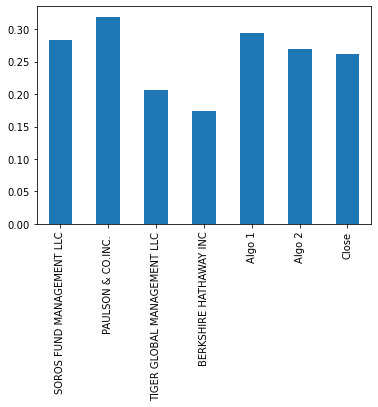

In [93]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

#I believe Algo 1 performed better than the whales portfolios

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [4]:
# Reading data from 1st stock
csv_path = Path("./Resources/Norweigan.csv")
nclh_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

nclh_df.head(10)

,Close
Date,
2020-06-30 16:00:00,16.43
2020-07-01 16:00:00,16.42
2020-07-02 16:00:00,15.97
2020-07-06 16:00:00,16.13
2020-07-07 16:00:00,15.27
2020-07-08 16:00:00,15.99
2020-07-09 16:00:00,15.20
2020-07-10 16:00:00,16.40
2020-07-13 16:00:00,15.60


In [5]:
# Reading data from 2nd stock
csv_path = Path("./Resources/Carnival.csv")
carnival_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

carnival_df.head(10)

,Close
Date,
2020-06-30 16:00:00,16.42
2020-07-01 16:00:00,16.36
2020-07-02 16:00:00,15.88
2020-07-06 16:00:00,15.61
2020-07-07 16:00:00,14.57
2020-07-08 16:00:00,15.32
2020-07-09 16:00:00,14.58
2020-07-10 16:00:00,16.16
2020-07-13 16:00:00,15.28


In [6]:
# Reading data from 3rd stock
csv_path = Path("./Resources/Royal_caribbean.csv")
rcl_df = pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)

rcl_df.head(10)
#pd.read_csv(bac_path, infer_datetime_format=True)

,Close
Date,
2020-06-30 16:00:00,50.30
2020-07-01 16:00:00,50.83
2020-07-02 16:00:00,49.51
2020-07-06 16:00:00,50.02
2020-07-07 16:00:00,47.56
2020-07-08 16:00:00,50.07
2020-07-09 16:00:00,47.12
2020-07-10 16:00:00,51.77
2020-07-13 16:00:00,49.54


In [9]:
# Combine all stocks in a single DataFrame
cruise_returns = pd.concat([nclh_df, carnival_df, rcl_df], axis="columns", join="inner")
cruise_returns.head()

,Close,Close,Close
Date,,,
2020-06-30 16:00:00,16.43,16.42,50.30
2020-07-01 16:00:00,16.42,16.36,50.83
2020-07-02 16:00:00,15.97,15.88,49.51
2020-07-06 16:00:00,16.13,15.61,50.02
2020-07-07 16:00:00,15.27,14.57,47.56


In [7]:
# Reset Date index
cruise_returns.set_index(cruise_returns ['Date'], inplace=True)
cruise_returns.head()


NameError: name 'cruise_returns' is not defined

In [10]:
# Reorganize portfolio data by having a column per symbol
cruise_returns.columns = ['NCLH', 'CCL', 'RCL']
cruise_returns.head()

,NCLH,CCL,RCL
Date,,,
2020-06-30 16:00:00,16.43,16.42,50.30
2020-07-01 16:00:00,16.42,16.36,50.83
2020-07-02 16:00:00,15.97,15.88,49.51
2020-07-06 16:00:00,16.13,15.61,50.02
2020-07-07 16:00:00,15.27,14.57,47.56


In [11]:
# Calculate daily returns
daily_combine_returns = cruise_returns.pct_change()
# Drop NAs
daily_combine_returns.dropna(inplace=True)
daily_combine_returns.columns = ['NCLH', 'CCL', 'RCL']
daily_combine_returns.head(10)
# Display sample data


,NCLH,CCL,RCL
Date,,,
2020-07-01 16:00:00,-0.000609,-0.003654,0.010537
2020-07-02 16:00:00,-0.027406,-0.029340,-0.025969
2020-07-06 16:00:00,0.010019,-0.017003,0.010301
2020-07-07 16:00:00,-0.053317,-0.066624,-0.049180
2020-07-08 16:00:00,0.047151,0.051476,0.052775
2020-07-09 16:00:00,-0.049406,-0.048303,-0.058918
2020-07-10 16:00:00,0.078947,0.108368,0.098684
2020-07-13 16:00:00,-0.048780,-0.054455,-0.043075
2020-07-14 16:00:00,-0.017308,-0.015707,-0.028058


<AxesSubplot:xlabel='Date'>

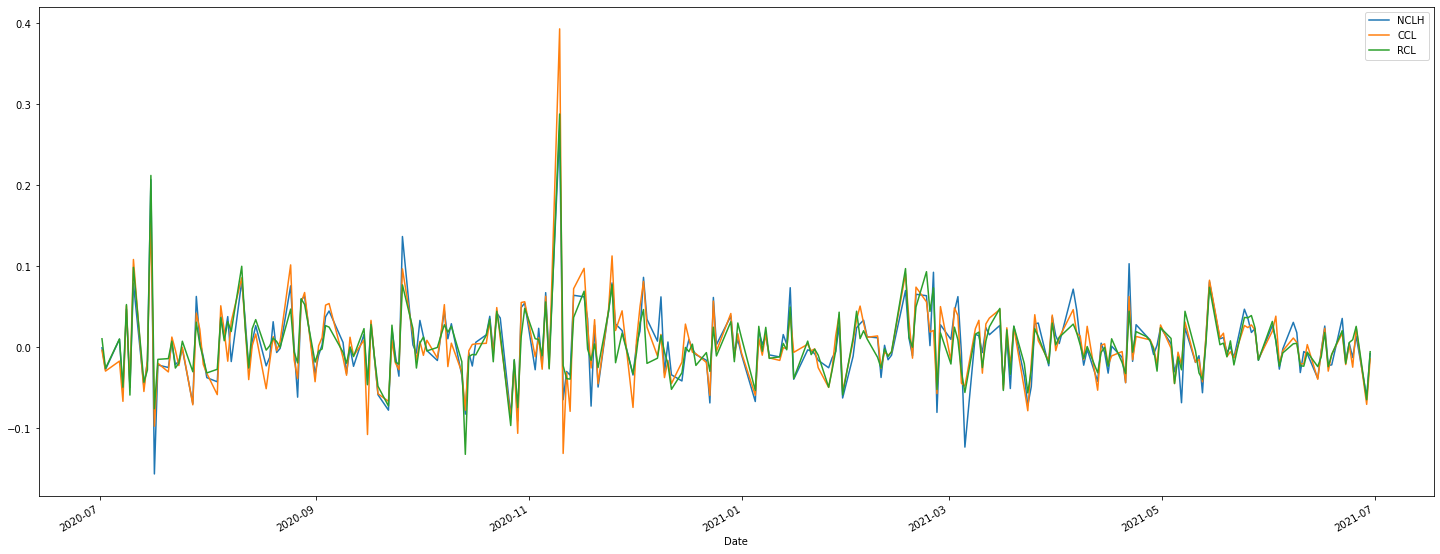

In [12]:
daily_combine_returns = cruise_returns.pct_change()
daily_combine_returns.plot(figsize=(25,10))

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [13]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = cruise_returns.dot(weights)
weighted_returns.sum

# Display sample data
weighted_returns.head(10)

Date
2020-06-30 16:00:00    27.716667
2020-07-01 16:00:00    27.870000
2020-07-02 16:00:00    27.120000
2020-07-06 16:00:00    27.253333
2020-07-07 16:00:00    25.800000
2020-07-08 16:00:00    27.126667
2020-07-09 16:00:00    25.633333
2020-07-10 16:00:00    28.110000
2020-07-13 16:00:00    26.806667
2020-07-14 16:00:00    26.173333
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [14]:
# Join your returns DataFrame to the original returns DataFrame
new_cruise_returns = pd.concat([nclh_df, carnival_df, rcl_df, weighted_returns], axis="columns", join="inner")
new_cruise_returns.head()

,Close,Close,Close,0
Date,,,,
2020-06-30 16:00:00,16.43,16.42,50.30,27.716667
2020-07-01 16:00:00,16.42,16.36,50.83,27.870000
2020-07-02 16:00:00,15.97,15.88,49.51,27.120000
2020-07-06 16:00:00,16.13,15.61,50.02,27.253333
2020-07-07 16:00:00,15.27,14.57,47.56,25.800000


In [15]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
new_cruise_returns.columns = ['NCLH', 'CCL', 'RCL', 'Weighted']
new_cruise_returns.head()

,NCLH,CCL,RCL,Weighted
Date,,,,
2020-06-30 16:00:00,16.43,16.42,50.30,27.716667
2020-07-01 16:00:00,16.42,16.36,50.83,27.870000
2020-07-02 16:00:00,15.97,15.88,49.51,27.120000
2020-07-06 16:00:00,16.13,15.61,50.02,27.253333
2020-07-07 16:00:00,15.27,14.57,47.56,25.800000


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [16]:
# Calculate the annualized `std`
cruise_annual_std = new_cruise_returns * np.sqrt(252)
cruise_annual_std.head(10)

,NCLH,CCL,RCL,Weighted
Date,,,,
2020-06-30 16:00:00,260.818164,260.659419,798.487746,439.988443
2020-07-01 16:00:00,260.659419,259.706949,806.901235,442.422534
2020-07-02 16:00:00,253.515891,252.087185,785.946884,430.516653
2020-07-06 16:00:00,256.055812,247.801068,794.042883,432.633254
2020-07-07 16:00:00,242.403735,231.291580,754.991594,409.562303
2020-07-08 16:00:00,253.833381,243.197461,794.836609,430.622483
2020-07-09 16:00:00,241.292520,231.450325,748.006811,406.916552
2020-07-10 16:00:00,260.341929,256.532047,821.823272,446.232416
2020-07-13 16:00:00,247.642323,242.562480,786.423120,425.542641


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

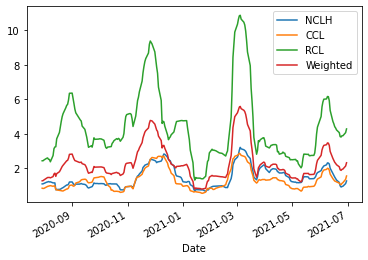

In [17]:
# Calculate rolling standard deviation
new_cruise_returns.rolling(window=21).std().plot()
# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

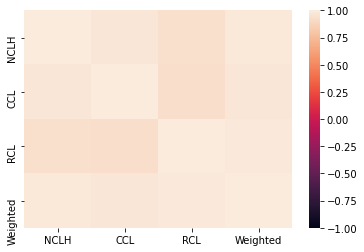

In [19]:
# Calculate and plot the correlation
import seaborn as sns
cruise_correlation = new_cruise_returns.corr()
# Display de correlation matrix
sns.heatmap(cruise_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta'}, xlabel='Date'>

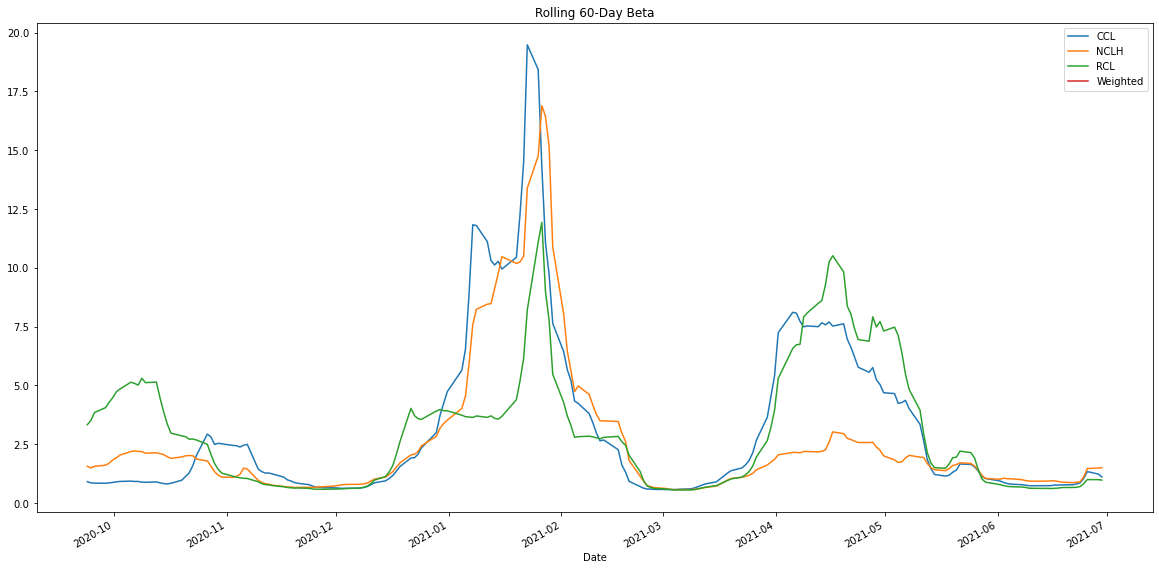

In [41]:
# Calculate and plot Beta
rolling_covariance = new_cruise_returns.rolling(window=60).cov(cruise_returns)


rolling_variance = new_cruise_returns.rolling(window=30).var()


rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Calculate Annualzied Sharpe Ratios
sr = (
    (cruise_returns.mean().mean()) * 252
    ) / (
    cruise_returns.std() * np.sqrt(252)
    )
sr

NCLH    102.419748
CCL     111.851893
RCL      47.150994
dtype: float64

<AxesSubplot:>

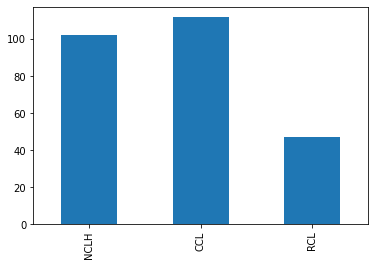

In [27]:
# Visualize the sharpe ratios as a bar plot
sr.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
#My Cruiseline portfolio performed adequately considering major disruption to the industry by COVID-19 